# [[공빅데] seaborn으로 그래프 그리기](https://cafe.naver.com/21pbds)

[참고](https://wonhwa.tistory.com/32)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.rc('font', family = 'Malgun Gothic')

### step1. 밀집도 그래프, 히스토그램

seaborn 라이브러리에서는 distplot을 이용하면 히스토그램과 밀집도 그래프를 동시에 그릴 수 있다.  
고객의 매장 구매량 정보를 히스토그램 및 밀집도 그래프로 시각화한다.

In [2]:
#데이터 셋 불러오기
df = pd.read_csv('pydata/marketing_campaign.csv',sep='\t')

C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\user\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\user\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


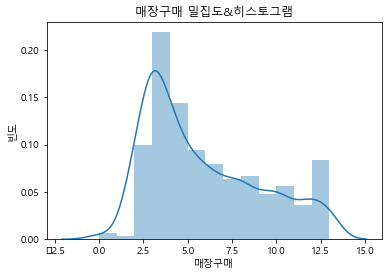

In [3]:
### seaborn으로 그래프 그리기 ###
## 밀집도 그래프와 히스토그램 같이 그리기 ##
# 그래프 바탕 생성
ax = plt.subplot()

# 밀집도 그래프 없애려면 kde=False 추가, 밀집도만 남기려면 hist=False 추가
ax = sns.distplot(df['NumStorePurchases'],kde=True,hist=True,bins=13)

# 제목 생성
ax.set_title('매장구매 밀집도&히스토그램')

# x라벨
ax.set_xlabel('매장구매')

# y라벨
ax.set_ylabel('빈도')

# 그래프 popup
plt.show()

히스토그램 그래프만 남기고 싶으면 sns.distplot(kde = False)로 바꾸어 준다.  
밀집도만 남기고 싶을 때는 sns.distplot(hist = False)로 바꾸어 준다.  
또 seaborn에서는 rug 그래프(양탄자 그래프)를 그려 데이터의 밀집 정도를 확인할 수 있다.

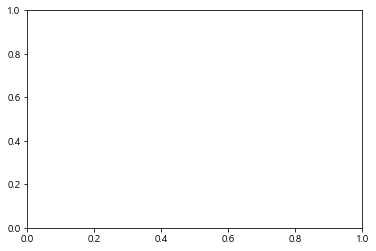

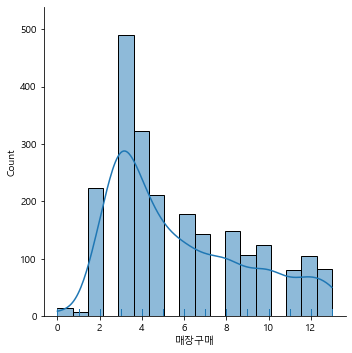

In [7]:
# rug 추가
ax1 = plt.subplots()
ax1 = sns.displot(df['NumStorePurchases'],kde = True,rug=True)
ax1.set_titles('매장구매 히스토그램 양탄자그래프')
ax1.set_xlabels('매장구매')
plt.show()

### step2. count 그래프

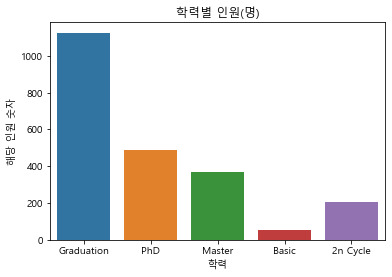

In [12]:
## count 그래프 그리기(이산값) ##
ax2 = plt.subplots()
ax2 = sns.countplot(x='Education', data = df)
ax2.set_title('학력별 인원(명)')
ax2.set_xlabel('학력')
ax2.set_ylabel('해당 인원 숫자')
plt.show()

### step3. 산점도 그래프

산점도는 regplot을 이용하여 그릴 수 있다.  
육류구매량을 x, 와인구매량을 y로 하여 산점도를 그린다.

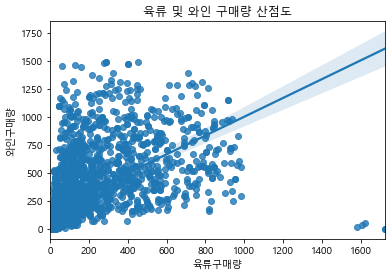

In [14]:
##이변량그래프 그리기##
# 산점도 그래프 그리기
ax3 = plt.subplots()
ax3 = sns.regplot(x='MntMeatProducts', y = 'MntWines', data=df, fit_reg=True) # 회귀선 제거시 fig_reg = False
ax3.set_title('육류 및 와인 구매량 산점도')
ax3.set_xlabel('육류구매량')
ax3.set_ylabel('와인구매량')
plt.show()

regplot은 회귀선까지 같이 그려지는데 회귀선을 제거하고 싶으면  
sns.regplot(fit_reg = False)로 바꿔준다.  
또한 jointplot을 사용하여 산점도와 히스토그램을 동시에 그릴 수도 있다.

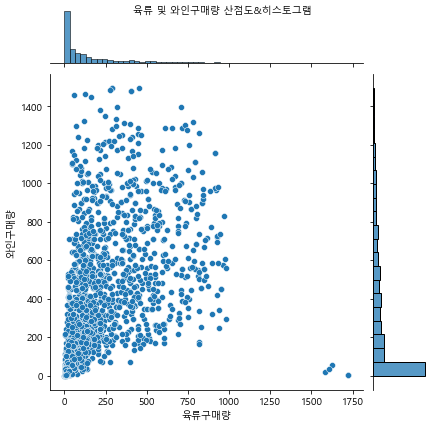

In [16]:
# 산점도&히스토그램 그리기
joint = sns.jointplot(x='MntMeatProducts', y='MntWines', data=df)
joint.set_axis_labels(xlabel='육류구매량', ylabel='와인구매량')
joint.fig.suptitle('육류 및 와인구매량 산점도&히스토그램', fontsize=10)
plt.show()